# Feature Taxicab – interactive play  
  
This notebook lets you **play the customised “Feature Taxicab” environment** that you pasted.  
At each step you’ll be asked for an action:

| index | meaning  |
|-------|----------|
| 0     | **UP**   |
| 1     | **DOWN** |
| 2     | **LEFT** |
| 3     | **RIGHT**|
| 4     | **PICK UP** |
| 5     | **DROP OFF** |

The notebook will  
* execute the action,  
* print the new reward & raw observation, and  
* display the rendered frame.

> **Prerequisites**  
> * `feature_taxicab.py`, `utils.py`, the `assets/` folder and your YAML hyper‑parameter file must live in the **same directory** as this notebook.  
> * Python ≥ 3.9 with the packages in the first code‑cell installed.


In [9]:
# ------------------------------------------------------------
# (Optional) install runtime dependencies
# ------------------------------------------------------------
# If you are missing any of these packages, remove the leading
# '#' and run the cell once.
#
# !pip install -q gymnasium numpy opencv-python-headless matplotlib pyyaml


In [1]:
# ------------------------------------------------------------
# Imports & utility helpers
# ------------------------------------------------------------
import os, yaml, numpy as np, cv2, matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Adjust the import below if your python file has a different name
from envs.taxicab.language_taxicab import LanguageTaxicab, LanguageTaxicabFactory
from utils import setup_artefact_paths

# Helper to display a rendered frame inline
def show_frame(img):
    plt.figure(figsize=(4,4))
    # convert BGR (OpenCV) ➜ RGB (matplotlib)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


/home/djordje/miniconda3/envs/rlexp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# ------------------------------------------------------------
# Load hyper‑parameters & create the environment
# ------------------------------------------------------------
parent_dir = os.path.dirname(os.getcwd())
# Fill yaml_path as desired, the rest should work as is.
yaml_path = os.path.join(parent_dir, "envs", "taxicab", "configs", "taxicab_easy.yaml")

script_path = os.path.join(os.getcwd(), 'language_taxicab_play.ipynb')
store_path, _ = setup_artefact_paths(script_path)

with open(yaml_path, 'r') as f:
    hparams = yaml.safe_load(f)

env = LanguageTaxicabFactory(
    hparams=hparams["environment"] if "environment" in hparams else hparams,
    store_path=store_path
).get_env(set_id="TRAIN", force_pomdp=False)

print('Environment ready ✔')


Environment ready ✔


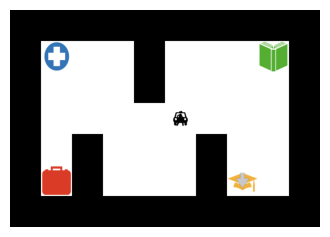

Step: 0
Return so far: 0
Current observation: [3 5 1 3 5 5 7 0 0]
Instruction: go to yellow school.
Choose action – 0:UP  1:DOWN  2:LEFT  3:RIGHT  4:PICK UP  5:DROP OFF


KeyboardInterrupt: Interrupted by user

In [5]:
# ---- initial reset ----
obs, _ = env.reset()
step = 0
total_reward = 0
last_reward = None          # stores reward from previous step
terminated = truncated = False

while not (terminated or truncated):
    clear_output(wait=True)

    # -------- show current frame ----------
    frame = env.render_frame()
    show_frame(frame)

    # -------- show textual info -----------
    print(f"Step: {step}")
    print(f"Return so far: {total_reward}")
    if last_reward is not None:
        print(f"Reward from previous action: {last_reward}")
    print(f"Current observation: {obs['features']}")
    print(f"Instruction: {obs['instr']}")
    print("Choose action – 0:UP  1:DOWN  2:LEFT  3:RIGHT  4:PICK UP  5:DROP OFF")

    # -------- get action ------------------
    try:
        action = int(input("Your action index: ").strip())
        if action not in range(6):
            raise ValueError
    except ValueError:
        print("❌  Please enter an integer 0‑5.")
        time.sleep(1)        # let the user read the error
        continue

    # -------- environment step ------------
    next_obs, reward, terminated, truncated, _ = env.step(action)

    # update bookkeeping
    last_reward = reward
    total_reward += reward
    obs = next_obs
    step += 1

# final display
clear_output(wait=True)
frame = env.render_frame()
show_frame(frame)
print("Episode finished.")
print(f"Total steps: {step}   Return: {total_reward}")